In [15]:
import numpy as np
#pip install pysindy
import pysindy as psd
from data_loader import data_loader_noH
import numpy as np
import matplotlib.pyplot as plt

In [16]:
x_train, dx_train, x_val, dx_val = data_loader_noH()

In [17]:
library = psd.PolynomialLibrary(degree=2)
model = psd.SINDy(optimizer=psd.STLSQ(threshold=0.05), feature_library=library)

In [18]:
model.fit(x_train, t = 1, x_dot=dx_train)

SINDy(differentiation_method=FiniteDifference(axis=-2),
      feature_library=PolynomialLibrary(),
      feature_names=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'],
      optimizer=STLSQ(threshold=0.05))

In [19]:
model.print()

(x0)' = 0.185 x1 + -0.101 x2 + -0.118 x3 + -0.076 x0 x1 + 0.230 x0 x2 + -0.125 x0 x3 + 0.070 x0 x4 + -0.080 x0 x5 + 0.129 x1 x2 + -0.205 x1 x4 + 0.150 x1 x6 + -0.181 x2^2 + 0.118 x2 x5 + -0.186 x2 x6 + 0.154 x3 x4
(x1)' = 0.444 x1 + -0.309 x2 + 0.161 x5 + -0.338 x6 + -0.059 x0 x1 + 0.251 x0 x2 + -0.093 x0 x3 + -0.072 x0 x5 + 0.161 x1 x2 + -0.254 x1 x4 + 0.096 x1 x6 + -0.126 x2^2 + -0.151 x2 x3 + 0.061 x2 x4 + -0.099 x2 x6 + 0.231 x3 x4 + 0.051 x5 x6
(x2)' = 0.373 x1 + -0.187 x2 + -0.175 x6 + -0.090 x0 x1 + 0.109 x0 x2 + 0.082 x1 x2 + -0.135 x1 x4 + 0.087 x1 x6 + -0.315 x2 x3 + 0.081 x2 x4 + 0.151 x3^2 + 0.092 x3 x4 + -0.072 x3 x6
(x3)' = 0.578 x1 + -0.351 x2 + 0.138 x5 + -0.396 x6 + 0.089 x0^2 + -0.163 x0 x1 + 0.074 x0 x4 + -0.099 x0 x5 + 0.145 x1 x2 + -0.142 x1 x4 + 0.083 x1 x6 + -0.110 x2 x3 + 0.093 x3 x4 + 0.085 x5 x6 + -0.055 x6^2
(x4)' = 0.145 1 + 0.789 x1 + -0.374 x2 + -0.499 x6 + 0.156 x0 x2 + -0.165 x0 x3 + -0.106 x1 x2 + 0.071 x1 x3 + -0.196 x1 x5 + 0.100 x1 x6 + 0.094 x3 x5 +

In [20]:
theta = np.array(library.transform(x_val))
sindy_coeff = np.transpose(model.coefficients())
dx_predict = np.matmul(theta, sindy_coeff)

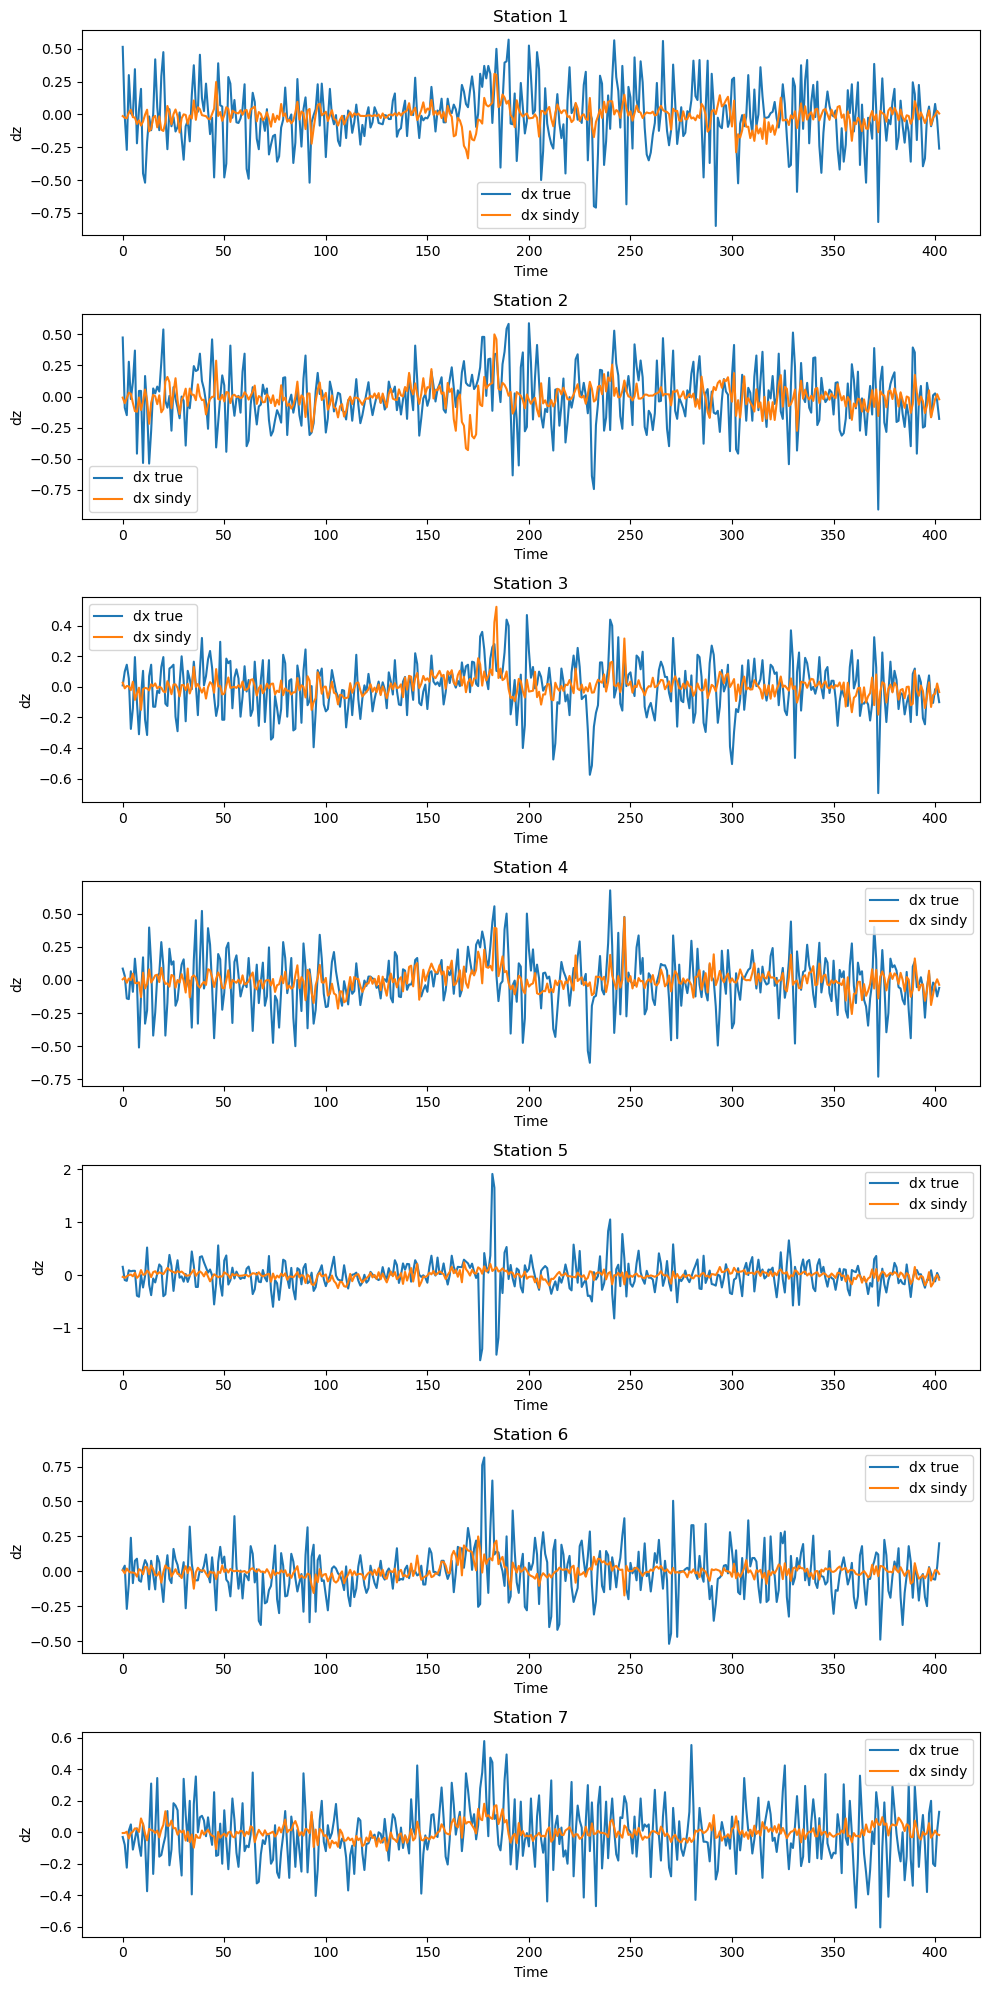

In [21]:
fig, axs = plt.subplots(nrows=dx_val.shape[1], ncols=1, figsize=(10, 20))

# Plot each column in a separate subplot
for i in range(dx_val.shape[1]):
    axs[i].plot(dx_val[:, i], label = 'dx true')
    axs[i].plot(dx_predict[:,i], label = 'dx sindy')
    axs[i].legend()

# Add titles and axis labels to the subplots
for i, ax in enumerate(axs):
    ax.set_title(f'Station {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('dz')

# Show the figure
plt.tight_layout()
plt.show()

In [14]:
#Simulate data with discovered governing equations
total_sim_timestep = 400
total_pred_step = 10
s = (total_sim_timestep, 7)
sim_result = np.zeros(s)

In [15]:
for t in range(0,total_sim_timestep,total_pred_step):
    x_init = x_val[t,:].reshape(1,-1)
    for s in range(total_pred_step):
        Theta_curr = np.array(library.transform(x_init))
        dx_curr = np.matmul(Theta_curr, sindy_coeff)
        x_new = x_init + dx_curr
        sim_result[t+s,:] = x_init
        x_init = np.array(x_new)

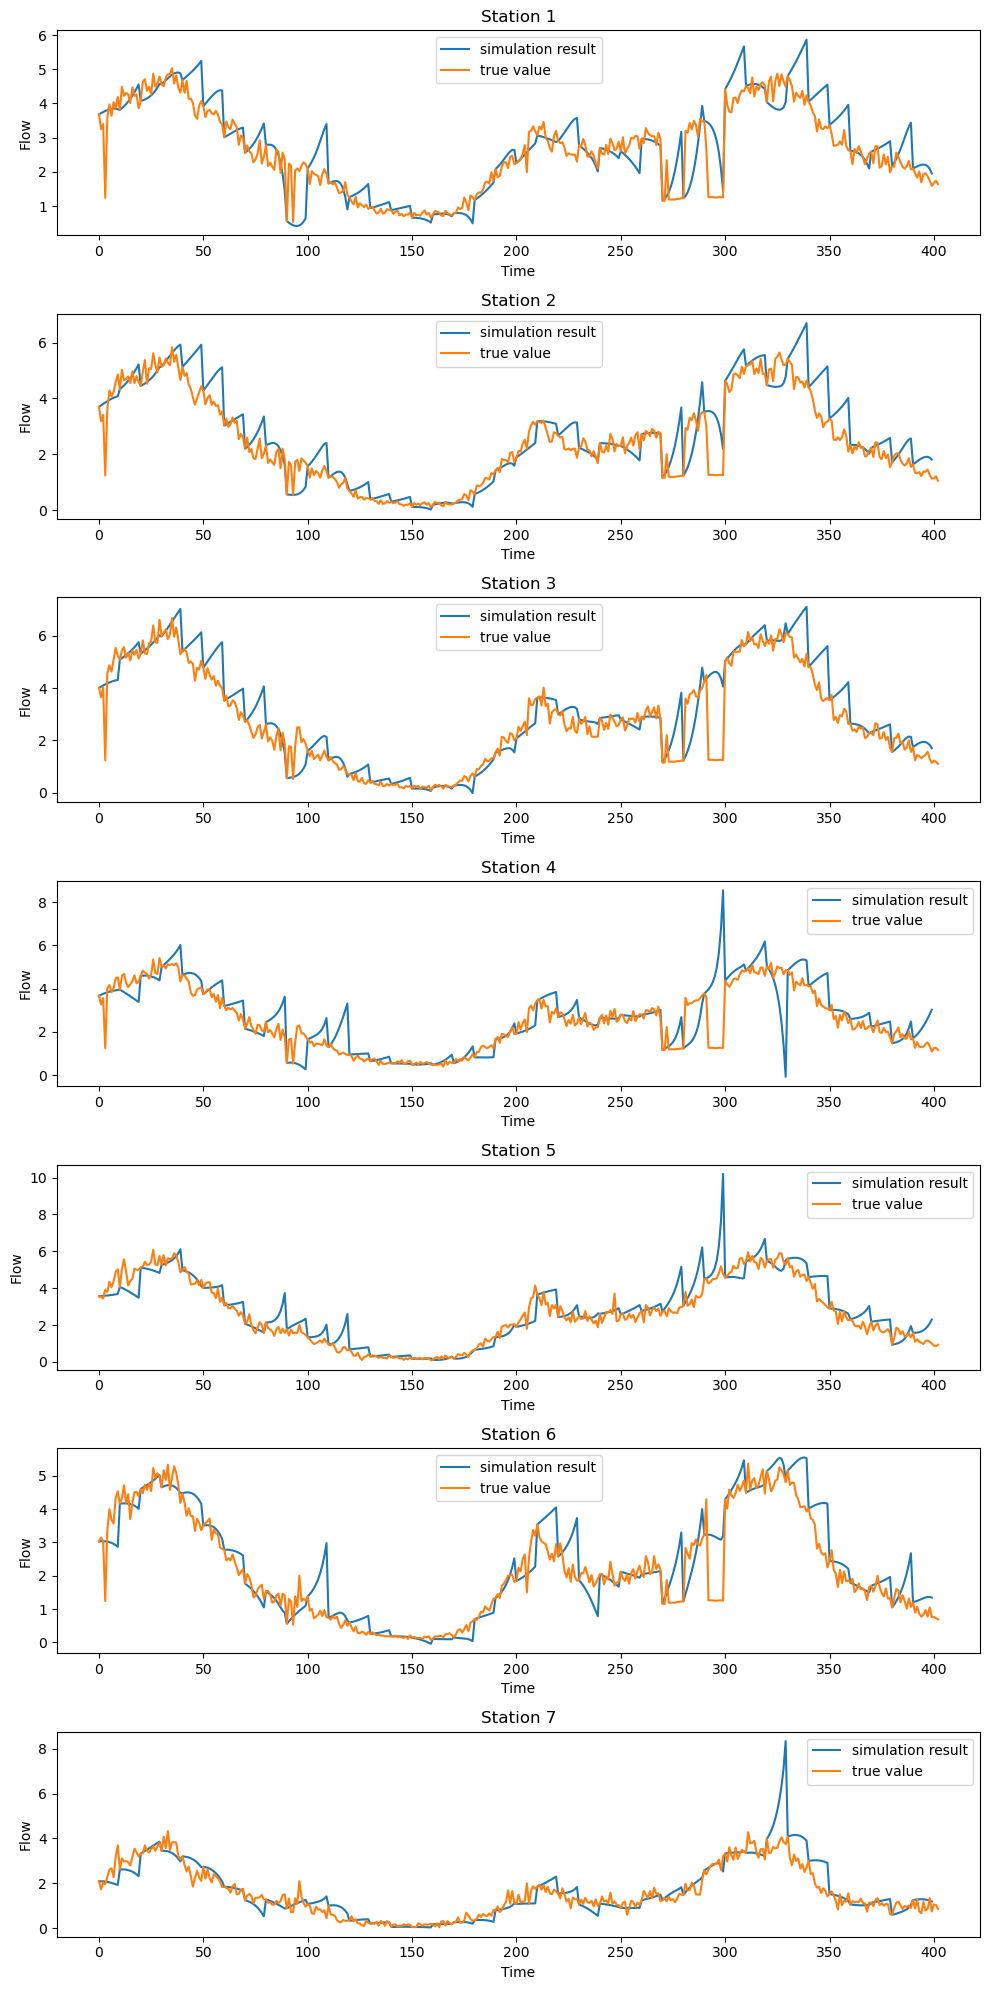

In [16]:
fig, axs = plt.subplots(nrows=x_val.shape[1], ncols=1, figsize=(10, 20))

# Plot each column in a separate subplot
for i in range(x_val.shape[1]):
    axs[i].plot(sim_result[:, i], label = "simulation result")
    axs[i].plot(x_val[:,i], label = "true value")
    axs[i].legend()

# Add titles and axis labels to the subplots
for i, ax in enumerate(axs):
    ax.set_title(f'Station {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Flow')

# Show the figure
plt.tight_layout()
plt.show()